Water Usage dataset

Description: Usage of safely managed drinking water services data to analyse.

In [ ]:
# Installing the libraries that we gonna need
!pip install pandas plotly
!pip install nbformat plotly pandas

In [12]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Importing data into pandas DataFrame
dataset = pd.read_csv(r'share-of-the-population-using-safely-managed-drinking-water-sources.csv')

# DataFrame shape
dataset.shape

(5737, 3)

In [14]:
# Displaying the first and last few rolls of the dataset
display(dataset.head())
display(dataset.tail())

,Country,Year,Usage of safely managed drinking water services
0,Afghanistan,2000,11.093327
1,Afghanistan,2001,11.105221
2,Afghanistan,2002,12.007733
3,Afghanistan,2003,12.909922
4,Afghanistan,2004,13.818684


,Country,Year,Usage of safely managed drinking water services
5732,Zimbabwe,2018,26.807938
5733,Zimbabwe,2019,26.683977
5734,Zimbabwe,2020,26.573847
5735,Zimbabwe,2021,26.476995
5736,Zimbabwe,2022,26.516428


In [15]:
x = dataset['Year'].unique()

display(x)
len(x)

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022])

23

In [16]:
# Looks like the dataset is already sorted by the Country column, and then by the Year column.
# Lets check for any missing values and the data type of each column
print(dataset.info())
display(dataset.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5737 entries, 0 to 5736
Data columns (total 3 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country                                          5737 non-null   object 
 1   Year                                             5737 non-null   int64  
 2   Usage of safely managed drinking water services  3784 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 134.6+ KB
None


Country                                               0
Year                                                  0
Usage of safely managed drinking water services    1953
dtype: int64

In [17]:
# What are the countries that don't have any measures in the Water Services Usage Column?
naCountries = dataset[dataset['Usage of safely managed drinking water services'].isna()]['Country'].unique()

# Creating a DataFrame with countries with missing values only
dfNaCountries = pd.DataFrame(naCountries, columns=['Country'])

# Creating a visualization using Ploty Express
fig = px.choropleth(dfNaCountries,
                    locations='Country',
                    locationmode='country names',
                    title='Map of Countries',
                    color_discrete_sequence=['blue'])

# Update the graph layout
fig.update_layout(title_font_size=20, geo=dict(showframe=False, showcoastlines=True))

# Saving a map file
fig.write_html("countries_map.html")
print("Graph saved as 'countries_map.html'. Open the file in your navegator to see a iterative map.")

Graph saved as 'countries_map.html'. Open the file in your navegator to see a iterative map.


In [18]:
# Filling the missing values with the mean of its own column
dataset['Usage of safely managed drinking water services'] = dataset['Usage of safely managed drinking water services'].fillna(
  dataset['Usage of safely managed drinking water services'].mean()
  )
# dataset.isna().sum()

In [19]:
# Summary statistics
dataset.describe()

,Year,Usage of safely managed drinking water services
count,5737.000000,5737.000000
mean,2010.972285,68.667447
std,6.586229,24.516444
min,2000.000000,1.430447
25%,2005.000000,64.634000
50%,2011.000000,68.667447
75%,2017.000000,89.854546
max,2022.000000,100.000000


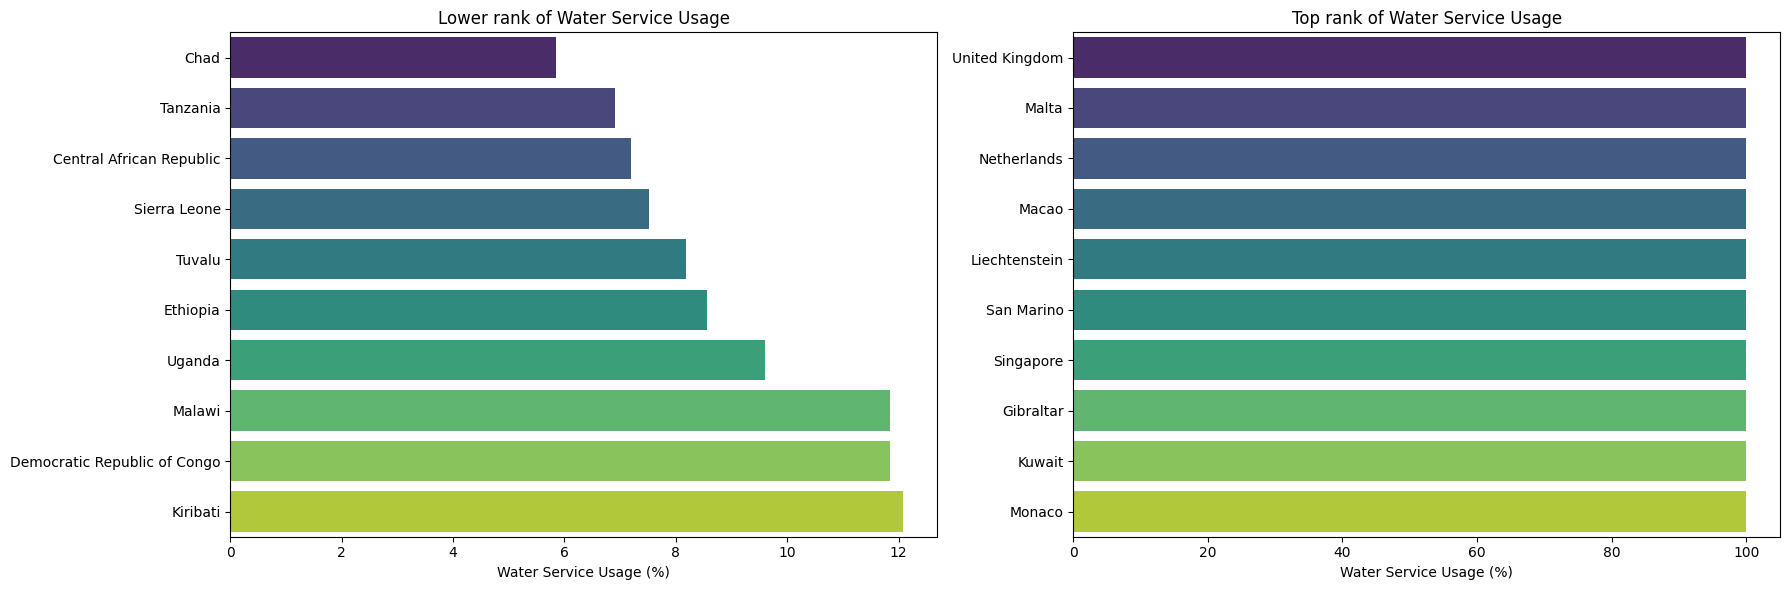

In [29]:
# Group by Country and calculate mean usage
country_usage = dataset.groupby('Country')['Usage of safely managed drinking water services'].mean().sort_values(ascending=True)
worst = pd.DataFrame(country_usage.head(10)).reset_index().rename(columns={'Usage of safely managed drinking water services': 'Water Service Usage (%)'})
top = pd.DataFrame(country_usage.tail(10)).reset_index().rename(columns={'Usage of safely managed drinking water services': 'Water Service Usage (%)'})

# Creating a barplot for the best and worst Water Service Usage
fig, axes = plt.subplots(1, 2, figsize=(18,6))

sns.barplot(data=worst, x = 'Water Service Usage (%)', y = 'Country', ax=axes[0], palette='viridis', hue='Country', legend=False)
axes[0].set_ylabel('')
axes[0].set_title('Lower rank of Water Service Usage')

sns.barplot(data=top, x = 'Water Service Usage (%)', y = 'Country', palette='viridis', hue='Country', legend=False, ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_title('Top rank of Water Service Usage')

plt.tight_layout()
plt.show()

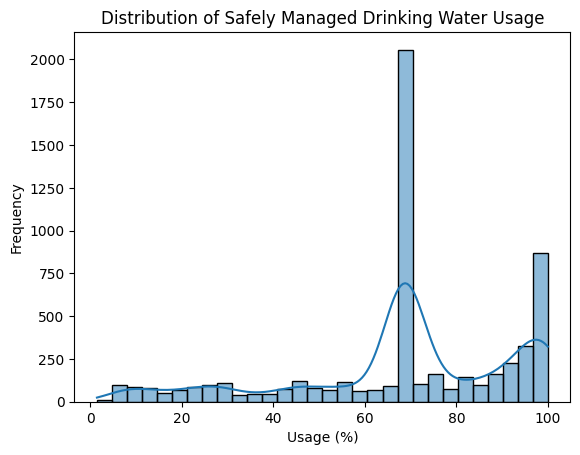

In [30]:
# Histogram of water usage
sns.histplot(dataset['Usage of safely managed drinking water services'], bins=30, kde=True)
plt.title('Distribution of Safely Managed Drinking Water Usage')
plt.xlabel('Usage (%)')
plt.ylabel('Frequency')
plt.show()